# **Retail Sales Analysis**
**Project:**
In this project, we are going to analyze 12 months of data of sales. We will learn how to clean, manage and analyze the dataset to find some meaningful information.

***We start by cleaning our data. Tasks during this section include:***

**1.**Drop NaN values from DataFrame

**2.**Removing rows based on a condition

**3.**Change the type of columns (to_numeric, to_datetime, astype)

***Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:***


1. What was the best month for sales? How much was earned that month?


2. What city sold the most product?


3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?


4. What products are most often sold together?


5. What product sold the most? Why do you think it sold the most?

**Import Necessary Libraries **

In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt

**Assign Path Variable to Path of**

**List all files from the directory**

To get all files from a specific directory , we can use listdir() method.

In [3]:
name=os.listdir('/content')
print(name)

['.config', 'Sales_December_2019.csv', 'Sales_January_2019.csv', 'Sales_June_2019.csv', 'Sales_August_2019.csv', 'Sales_March_2019.csv', 'Sales_February_2019.csv', 'Sales_May_2019.csv', 'Sales_October_2019.csv', 'Sales_April_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_November_2019.csv', 'sample_data']


**Merging 12 months of sales data in a single file**:
To Calculate and analyze Company Sales Data, We must merge all 12 CSV files into one.


In [5]:
edf=pd.DataFrame()
for i in name:
  if i.endswith('.csv'):
    df=pd.read_csv(i)
    edf=pd.concat([edf,df])
print(edf)

      Order ID                   Product Quantity Ordered Price Each  \
0       295665        Macbook Pro Laptop                1       1700   
1       295666        LG Washing Machine                1      600.0   
2       295667      USB-C Charging Cable                1      11.95   
3       295668          27in FHD Monitor                1     149.99   
4       295669      USB-C Charging Cable                1      11.95   
...        ...                       ...              ...        ...   
17656   295660    AAA Batteries (4-pack)                2       2.99   
17657   295661      USB-C Charging Cable                1      11.95   
17658   295662  Lightning Charging Cable                1      14.95   
17659   295663    AAA Batteries (4-pack)                1       2.99   
17660   295664              Google Phone                1        600   

           Order Date                        Purchase Address  
0      12/30/19 00:01  136 Church St, New York City, NY 10001  
1      

**Convert To CSV**

In [6]:
edf.to_csv('all_data.csv',index=False)

**Upload file**

In [7]:
df=pd.read_csv('/content/all_data.csv')
df=df.dropna(how='all')
print(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        295665        Macbook Pro Laptop                1       1700   
1        295666        LG Washing Machine                1      600.0   
2        295667      USB-C Charging Cable                1      11.95   
3        295668          27in FHD Monitor                1     149.99   
4        295669      USB-C Charging Cable                1      11.95   
...         ...                       ...              ...        ...   
186845   295660    AAA Batteries (4-pack)                2       2.99   
186846   295661      USB-C Charging Cable                1      11.95   
186847   295662  Lightning Charging Cable                1      14.95   
186848   295663    AAA Batteries (4-pack)                1       2.99   
186849   295664              Google Phone                1        600   

            Order Date                        Purchase Address  
0       12/30/19 00:01  136 Church St, New York City, NY 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Check Quantity Ordered isnumeric**

In [9]:
df['check']=df['Quantity Ordered'].str.isnumeric()
print(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        295665        Macbook Pro Laptop                1       1700   
1        295666        LG Washing Machine                1      600.0   
2        295667      USB-C Charging Cable                1      11.95   
3        295668          27in FHD Monitor                1     149.99   
4        295669      USB-C Charging Cable                1      11.95   
...         ...                       ...              ...        ...   
186845   295660    AAA Batteries (4-pack)                2       2.99   
186846   295661      USB-C Charging Cable                1      11.95   
186847   295662  Lightning Charging Cable                1      14.95   
186848   295663    AAA Batteries (4-pack)                1       2.99   
186849   295664              Google Phone                1        600   

            Order Date                        Purchase Address  check  
0       12/30/19 00:01  136 Church St, New York Cit

In [10]:
df=df.loc[df['check']==True]
print(df)

       Order ID                   Product Quantity Ordered Price Each  \
0        295665        Macbook Pro Laptop                1       1700   
1        295666        LG Washing Machine                1      600.0   
2        295667      USB-C Charging Cable                1      11.95   
3        295668          27in FHD Monitor                1     149.99   
4        295669      USB-C Charging Cable                1      11.95   
...         ...                       ...              ...        ...   
186845   295660    AAA Batteries (4-pack)                2       2.99   
186846   295661      USB-C Charging Cable                1      11.95   
186847   295662  Lightning Charging Cable                1      14.95   
186848   295663    AAA Batteries (4-pack)                1       2.99   
186849   295664              Google Phone                1        600   

            Order Date                        Purchase Address  check  
0       12/30/19 00:01  136 Church St, New York Cit

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   check             185950 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 10.1+ MB


**save the file **

In [12]:
df.to_csv('salse.csv',index=False)

In [13]:
df=pd.read_csv('/content/salse.csv')
print(df)

        Order ID                   Product  Quantity Ordered  Price Each  \
0         295665        Macbook Pro Laptop                 1     1700.00   
1         295666        LG Washing Machine                 1      600.00   
2         295667      USB-C Charging Cable                 1       11.95   
3         295668          27in FHD Monitor                 1      149.99   
4         295669      USB-C Charging Cable                 1       11.95   
...          ...                       ...               ...         ...   
185945    295660    AAA Batteries (4-pack)                 2        2.99   
185946    295661      USB-C Charging Cable                 1       11.95   
185947    295662  Lightning Charging Cable                 1       14.95   
185948    295663    AAA Batteries (4-pack)                 1        2.99   
185949    295664              Google Phone                 1      600.00   

            Order Date                        Purchase Address  check  
0       12/30/1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   check             185950 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 8.7+ MB


**Find amount**

In [17]:
df['Amount']=df['Quantity Ordered'] * df['Price Each']
print(df['Amount'])

0         1700.00
1          600.00
2           11.95
3          149.99
4           11.95
           ...   
185945       5.98
185946      11.95
185947      14.95
185948       2.99
185949     600.00
Name: Amount, Length: 185950, dtype: float64


**Convert to Date-Time **

In [20]:
df['order date']=pd.to_datetime(df['Order Date'])


<ipython-input-20-d20ceb3d61ee>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order date']=pd.to_datetime(df['Order Date'])


**Find Month and month name**

In [21]:
df['month']=df['order date'].dt.month
df['month_name']=df['order date'].dt.month_name()


0         December
1         December
2         December
3         December
4         December
            ...   
185945    November
185946    November
185947    November
185948    November
185949    November
Name: month_name, Length: 185950, dtype: object


**find city by address colum**

In [22]:
def find_city(st):
        return st.split(',')[1]

In [23]:
df['city']=df['Purchase Address'].apply(find_city)
print(df['city'])

0          New York City
1          New York City
2          New York City
3          San Francisco
4                Atlanta
               ...      
185945       Los Angeles
185946            Austin
185947            Boston
185948            Boston
185949            Boston
Name: city, Length: 185950, dtype: object


In [24]:
df.to_csv('salse.csv',index=False)

In [25]:
df=pd.read_csv('/content/salse.csv')
print(df)

        Order ID                   Product  Quantity Ordered  Price Each  \
0         295665        Macbook Pro Laptop                 1     1700.00   
1         295666        LG Washing Machine                 1      600.00   
2         295667      USB-C Charging Cable                 1       11.95   
3         295668          27in FHD Monitor                 1      149.99   
4         295669      USB-C Charging Cable                 1       11.95   
...          ...                       ...               ...         ...   
185945    295660    AAA Batteries (4-pack)                 2        2.99   
185946    295661      USB-C Charging Cable                 1       11.95   
185947    295662  Lightning Charging Cable                 1       14.95   
185948    295663    AAA Batteries (4-pack)                 1        2.99   
185949    295664              Google Phone                 1      600.00   

            Order Date                        Purchase Address   Amount  \
0       12/3

**What was the best month for sales? How much was earned that month**

In [31]:
ndf=df.groupby('month_name').agg(
    total_sales=('Amount','sum')
)
print(ndf)

            total_sales
month_name             
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13


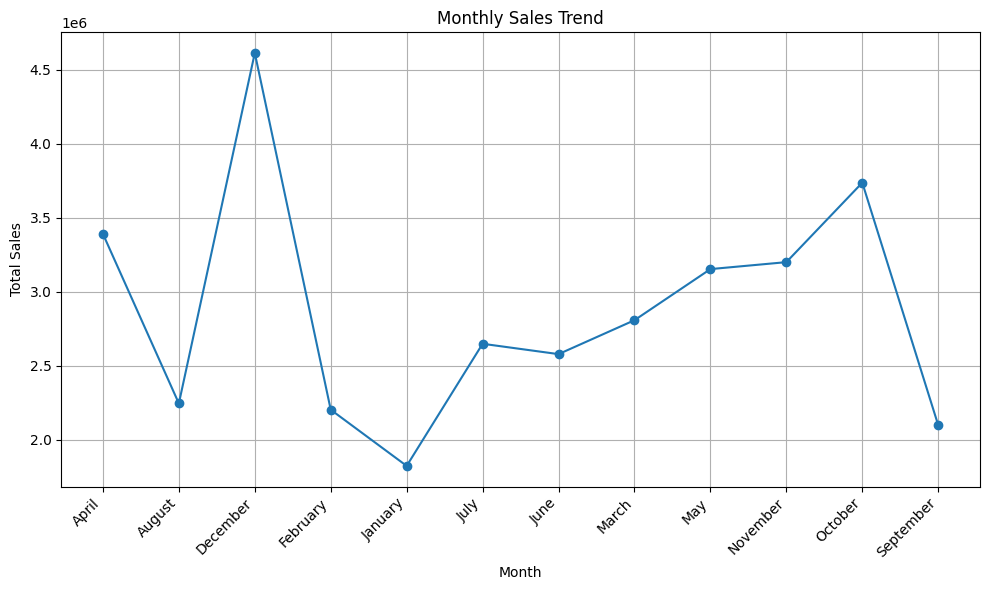

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(ndf.index, ndf['total_sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

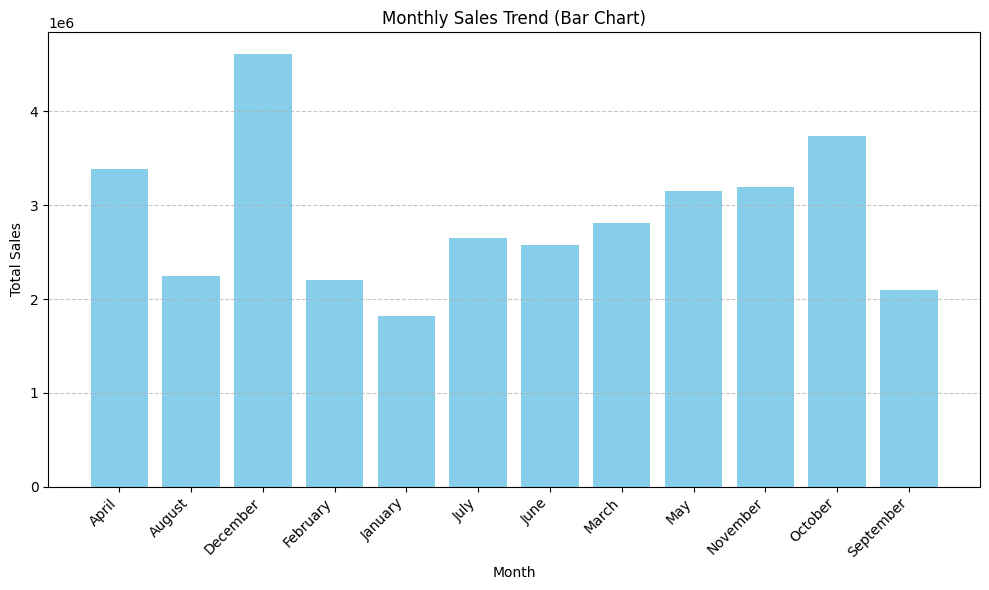

In [42]:

plt.figure(figsize=(10, 6))
plt.bar(ndf.index, ndf['total_sales'], color='skyblue')  # Use bar chart
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend (Bar Chart)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

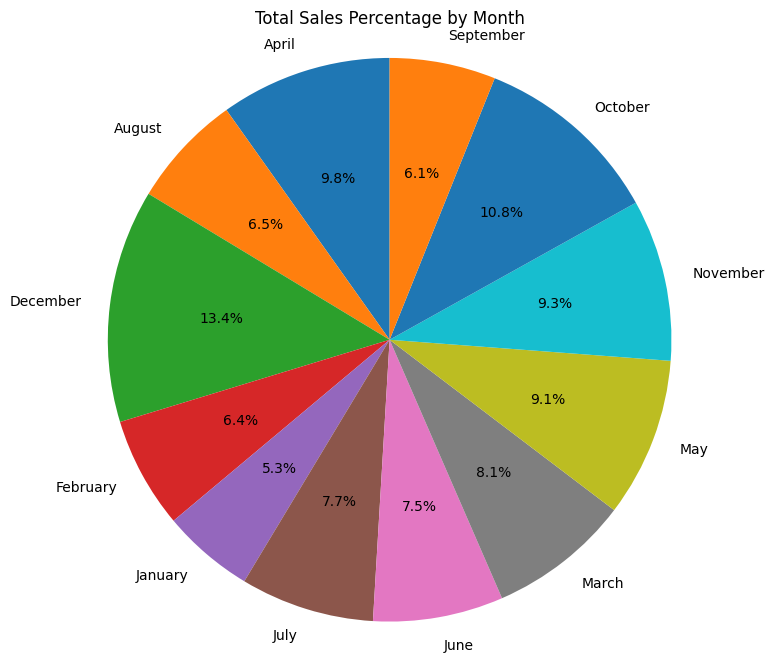

In [45]:
plt.figure(figsize=(8,8))
plt.pie(ndf['total_sales'], labels=ndf.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales Percentage by Month')
plt.axis('equal')
plt.show()

**What city sold the most product?**

In [56]:
city_sales = df.groupby('city')['Quantity Ordered'].sum()
print(city_sales)

city
Atlanta          16602
Austin           11153
Boston           22528
Dallas           16730
Los Angeles      33289
New York City    27932
Portland         14053
San Francisco    50239
Seattle          16553
Name: Quantity Ordered, dtype: int64


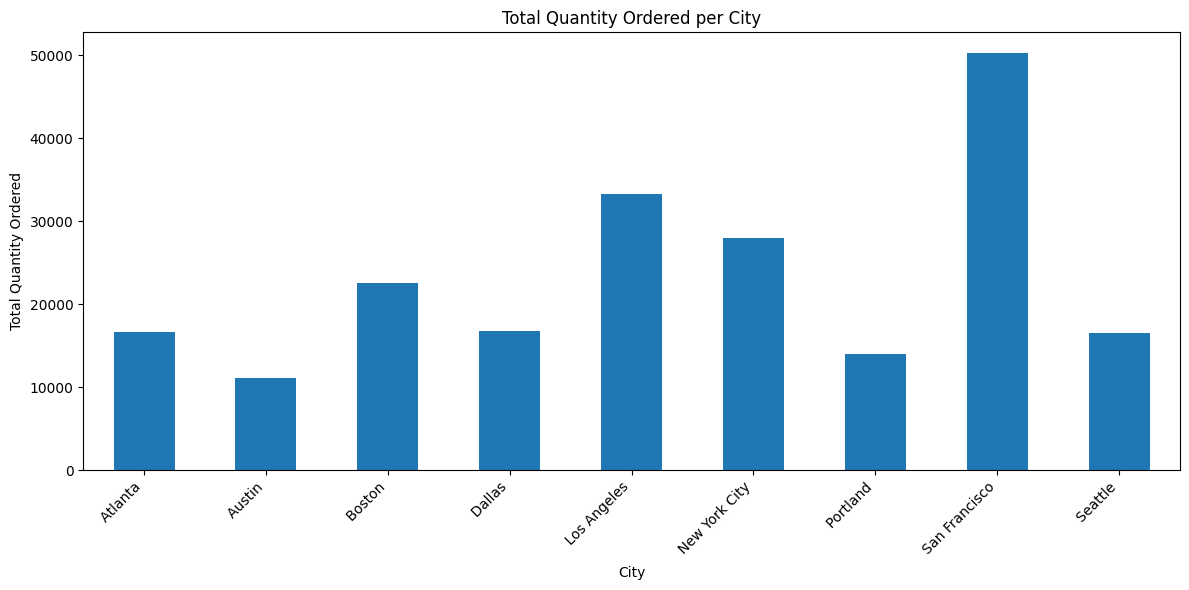

The city with the most product sold is:  San Francisco


In [59]:

plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title('Total Quantity Ordered per City')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


city_with_most_sales = city_sales.idxmax()
print(f"The city with the most product sold is: {city_with_most_sales}")

**What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

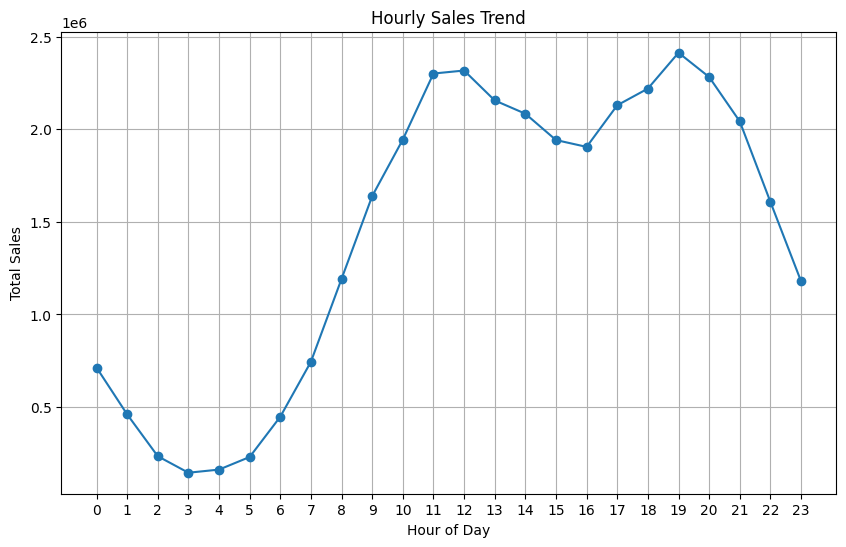

The best hour to display advertisements is: 19:00


In [60]:

df['order date'] = pd.to_datetime(df['order date'])
df['hour'] = df['order date'].dt.hour
hourly_sales = df.groupby('hour')['Amount'].sum()


plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Trend')
plt.grid(True)
plt.xticks(range(24))  # Ensure all hours are displayed on the x-axis
plt.show()


# Find the hour with the highest sales
best_hour = hourly_sales.idxmax()
print(f"The best hour to display advertisements is: {best_hour}:00")

In [74]:
df['hour'] = df['order date'].dt.hour
hourly_sales = df.groupby('hour')['Amount'].sum().sort_values(ascending=False)
print(hourly_sales)

hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Amount, dtype: float64


**What products are most often sold together?**

In [78]:
df = df[df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
from itertools import combinations
from collections import Counter

count = Counter()
row_list = []
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 271),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  50),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  20),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 17)]

**What product sold the most? Why do you think it sold the most?**

In [80]:
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(product_sales)


Product
USB-C Charging Cable          2292
Lightning Charging Cable      1949
iPhone                        1867
Wired Headphones              1825
Google Phone                  1642
AAA Batteries (4-pack)        1251
AA Batteries (4-pack)         1013
Apple Airpods Headphones       982
Bose SoundSport Headphones     827
Vareebadd Phone                602
27in FHD Monitor               298
27in 4K Gaming Monitor         251
34in Ultrawide Monitor         247
Macbook Pro Laptop             197
Flatscreen TV                  179
ThinkPad Laptop                176
20in Monitor                   161
LG Washing Machine              28
LG Dryer                        25
Name: Quantity Ordered, dtype: int64


<Axes: xlabel='Product'>

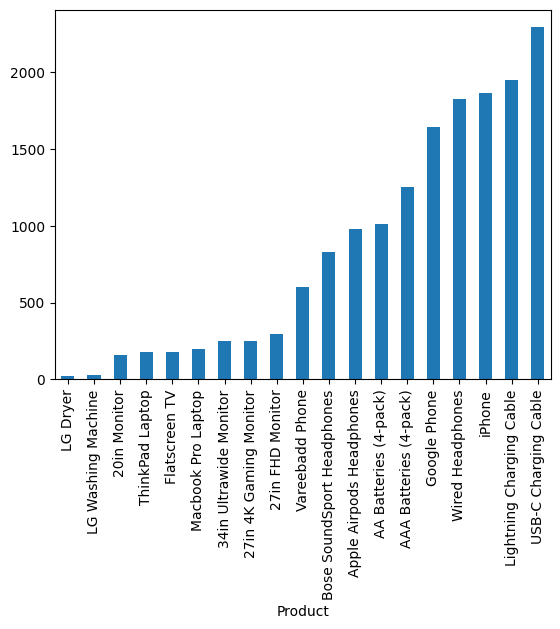

In [83]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values().plot(kind='bar')